In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Data**

In [3]:
path = "D:/Study/Projects/LiveProject1/Consumer_creditworthiness_train_data.xlsx"
df = pd.read_excel(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [4]:
# Firstly converting the target valiable value to numerical
df['Loan_Status'] = df['Loan_Status'].map( {'Y' : 1, 'N' : 0} )
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,1
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,0
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,1
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,1
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 53.0+ KB


**Data Dictionary**

- Loan_ID: Unique Loan ID issued on every loan for a applicant, dtype: Object.
- Gender: Gender of a applicant whether male or female, dtype: string.
- Married: Martial status of a applicant i.e., Yes for married and NO for single, dtype: string.
- Dependents: Number of individuals who are financially dependent on applicant, dtype: integer.
- Education: Highest Education of applicant i.e, Bachelor, Post Graduation etc, dtype: string.
- Self_employed: Whether the applicant is self employed or not i.e, Yes for self employed or else NO, dtype: string.
- ApplicantIncome: Income of the applicant, dtype: integer.
- CoApplicantIncome: Applicant have to put one nominee name that is called - - - CoApplicant. So, it is column releated to coapplicant income, dtype: Integer.
- Loan Amount: Amount of loan applicant wants to issue from the bank.
- Loan_Amount_Term: The amount of time the lender gives you to repay your whole loan, dtype: float.
- Credit_History: It tells about the credit done in the past by the applicant, dtype: Integer.
- Property_Area: This tells about the applicant property is in which area i.e., Rural or Urban, dtype: String.
- Loan_status: It is a target variable column which tells about whether the applicant application for loan approval is passed or not, dtype: String.



## **Data Cleaning**

In [6]:
df.duplicated().sum()

0

There are no duplicate entries

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

There are 1-5% missing values in some features
Since the percentage of missing values is very less, it can be handled by tree based algorithms.

##### **Function**

In [9]:
def stacked_count_grouped(df, column_name, grouping_column):

    if(column_name != grouping_column):
      # Calculate count of occurrences for each category in the specified column, grouped by the grouping column
      df_grouped_counts = df.groupby(grouping_column)[column_name].value_counts(normalize=True).unstack()

      # Create a 100% stacked count chart for the specified column, grouped by the grouping column
      fig, ax = plt.subplots(figsize=(4, 4))
      df_grouped_counts.plot(kind='bar', stacked=True, ax=ax, width=0.7)

      # Add data labels
      for index, group in enumerate(df_grouped_counts.index):
          bottom = 0
          for category, count in df_grouped_counts.loc[group].items():
              ax.text(index, bottom + count / 2, f'{count*100:.1f}%', ha='center', va='center', color='white')
              bottom += count

      # Set plot properties
      # ax.set_ylabel('Percentage')
      ax.set_title(f"{column_name}")
      ax.set_xticks(range(len(df_grouped_counts.index)))
      #ax.set_xticklabels(df_grouped_counts.index, rotation=90, ha='right')
      ax.legend(title=column_name, bbox_to_anchor=(1.05, 1), loc='upper left')

      plt.tight_layout()
      plt.show()

#### **Missing value imputation**


In [10]:
# # Filling all the missing values with mode
# df = df.apply(lambda col: col.fillna(col.value_counts().index[0]))
# df.isnull().sum()

"""
Check distributions with other variables
"""

'\nCheck distributions with other variables\n'

In [11]:
# Looking at distributions of gender with other variables


## **Descriptive statistics**

In [12]:
# df.describe().T
df.describe(percentiles = [0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,90%,95%,99%,max
Loan_ID,521.0,5.475178e+05,2.613443e+05,101559.0,110159.60,138878.0,199414.0,314492.0,354399.0,452164.0,543412.0,631695.0,783776.0,911473.0,946950.0,987028.8,998791.0
ApplicantIncome,521.0,1.229406e+06,1.449755e+06,33750.0,242955.00,429075.0,497925.0,646875.0,686700.0,769050.0,858150.0,977400.0,1292850.0,2138400.0,3281175.0,8312490.0,18225000.0
CoapplicantIncome,521.0,3.495994e+05,4.824296e+05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,281250.0,384750.0,517950.0,856350.0,1125000.0,1864710.0,4500000.0
LoanAmount,521.0,2.797044e+05,1.712505e+05,0.0,0.00,88000.0,132000.0,196000.0,208000.0,230000.0,250000.0,270000.0,320000.0,450000.0,572000.0,988000.0,1400000.0
Loan_Amount_Term,507.0,3.432663e+02,6.360797e+01,12.0,86.16,180.0,300.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,480.0,480.0
Credit_History,478.0,8.472803e-01,3.600939e-01,0.0,0.00,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Loan_Status,521.0,6.871401e-01,4.641034e-01,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Observations**
- The feature Loan ID can be dropped since it is redundant
- Applicant income ranges from around 30,000 to 1.8 crore which could involve outliers so needs to be checked
- Co Applicant Income ranges from 0(no co applicant) to 45,00,000
- Loan amount ranges from 0 (no loan amount entered, possibly due to some error)  to 14,00,000
- Loan amount term ranges from 12 months to 48 months
- credit history is either 0 or 1
- loan status being the target variable will be either 0 or 1

In [13]:
df.describe(include = 'O').T

,count,unique,top,freq
Gender,511,2,Male,415
Married,518,2,Yes,335
Dependents,508,4,0,299
Education,521,2,Graduate,408
Self_Employed,494,2,No,427
Property_Area,521,3,Semiurban,197


In [14]:
#Looking at unique values of the data and whether any conversions are required

for col in df.columns:
  num_unique_values = len(df[col].unique())
  value_counts = df[col].value_counts()
  print(f"Column: {col} has {num_unique_values} unique values\n")
  print(value_counts)
  print("-------------------------------\n\n\n")

Column: Loan_ID has 521 unique values

Loan_ID
294853    1
536112    1
827443    1
131441    1
802464    1
         ..
643209    1
905520    1
264069    1
738104    1
552637    1
Name: count, Length: 521, dtype: int64
-------------------------------



Column: Gender has 3 unique values

Gender
Male      415
Female     96
Name: count, dtype: int64
-------------------------------



Column: Married has 3 unique values

Married
Yes    335
No     183
Name: count, dtype: int64
-------------------------------



Column: Dependents has 5 unique values

Dependents
0     299
1      84
2      84
3+     41
Name: count, dtype: int64
-------------------------------



Column: Education has 2 unique values

Education
Graduate        408
Not Graduate    113
Name: count, dtype: int64
-------------------------------



Column: Self_Employed has 3 unique values

Self_Employed
No     427
Yes     67
Name: count, dtype: int64
-------------------------------



Column: ApplicantIncome has 433 unique values

## **Univariate Analysis**

### **Functions**

In [15]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

  f2, (ax_box2, ax_hist2) = plt.subplots( nrows=2,  # Number of rows of the subplot grid= 2
                                          sharex=True,  # x-axis will be shared among all subplots
                                          gridspec_kw={"height_ratios": (0.25, 0.75)},
                                          figsize=figsize)  # creating the 2 subplots
  quantiles = np.array([df[feature].quantile(0.00),
                          df[feature].quantile(0.25),
                          df[feature].quantile(0.50),
                          df[feature].quantile(0.75),
                          df[feature].quantile(1.00)])

  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    # boxplot will be created and a marker will indicate the mean value of the column
    # with showmenas = True
  ax_box2.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
  ax_box2.set_xticks(quantiles)
  ax_box2.set_xlabel('value')


  if bins:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter")
  else:
    sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

  ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Green line shows mean
  ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")  # blue line shows median
  plt.show()  # show the plot

In [16]:
# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    # Barplot with percentage at the top

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # if v_ticks is True:
    #     plt.xticks(rotation=90)

    ax = sns.countplot(data=data,
                       x=feature,
                       palette="Paired",
                       order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:          #Every Bar in the chart is called a patch
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
            # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points")  # annotate the percentage
    plt.show()  # show the plot

In [17]:
df_cat = df.drop(['Loan_ID','ApplicantIncome',	'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [18]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1


### **Target Variable**

In [19]:
Y = df['Loan_Status']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

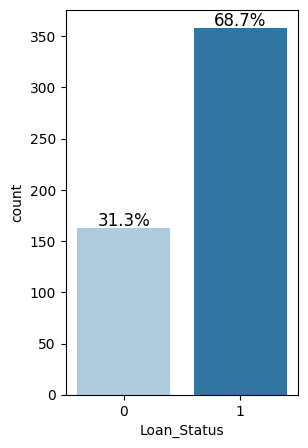

In [20]:
labeled_barplot(df, 'Loan_Status', True, False)

- Maximum loans are approved looking at loan status (not looking at the data as imbalanced, but taking it as the nature of the data)

### **Numerical Features**

#### **Dropping Redundant Feature Loan ID**

In [21]:
df = df.drop('Loan_ID', axis = 1)
'''
Loan ID has a unique value for each data point
Having too much variance, it would not give us any
information with the target variable'
'''

"\nLoan ID has a unique value for each data point\nHaving too much variance, it would not give us any\ninformation with the target variable'\n"

#### **Segregating numerical features**

In [22]:
df_num = df.select_dtypes(["int64", "float64"])
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1316025,0.0,250000,360.0,1.0,1
1,1031175,339300.0,256000,360.0,1.0,0
2,675000,0.0,132000,360.0,1.0,1
3,581175,530550.0,240000,360.0,1.0,1
4,1350000,0.0,282000,360.0,1.0,1


In [23]:
df_num = df_num.drop(['Credit_History', 'Loan_Status'], axis = 1)

#### **Visualizing Numerical Features**

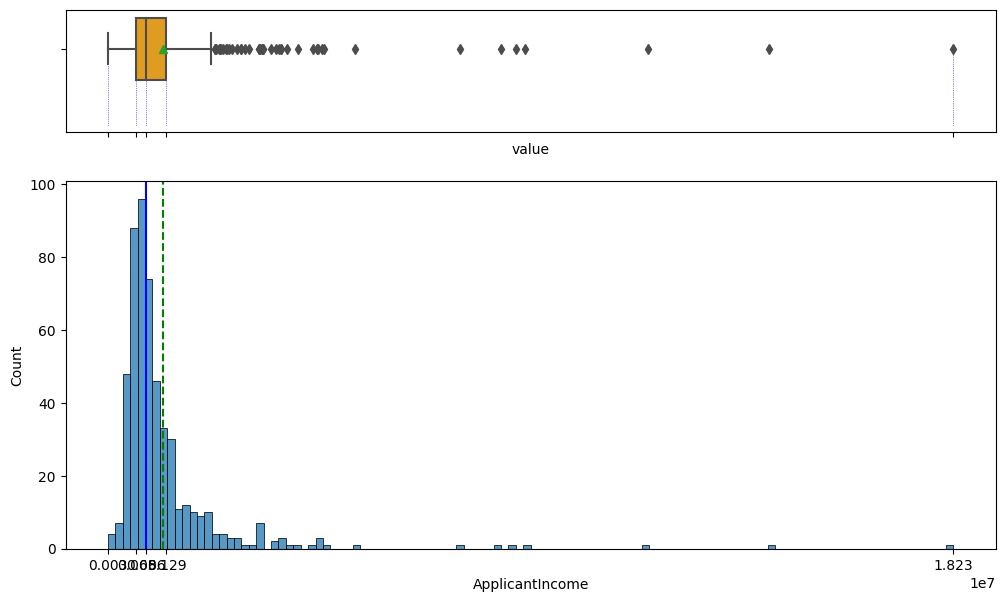

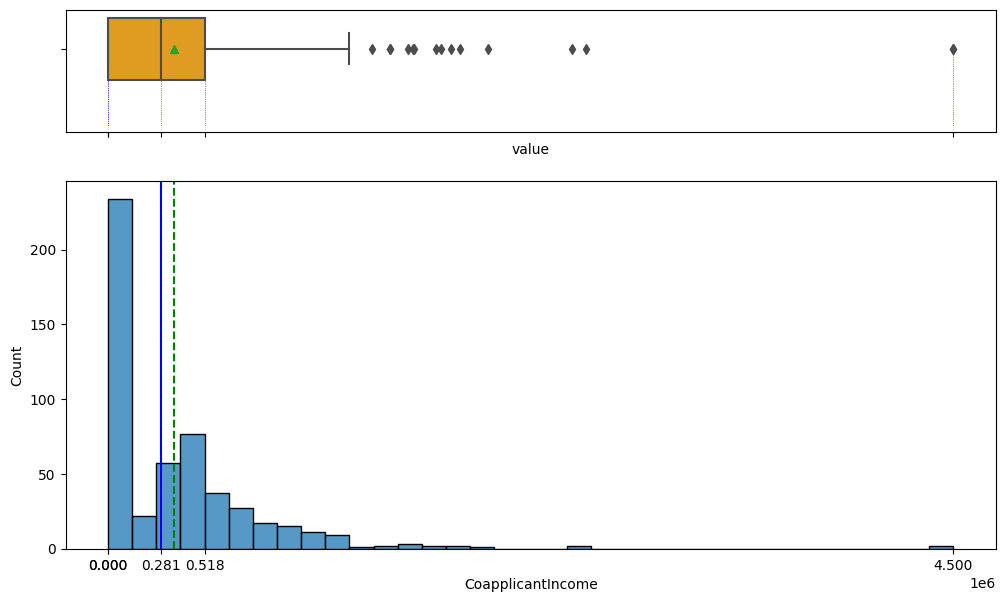

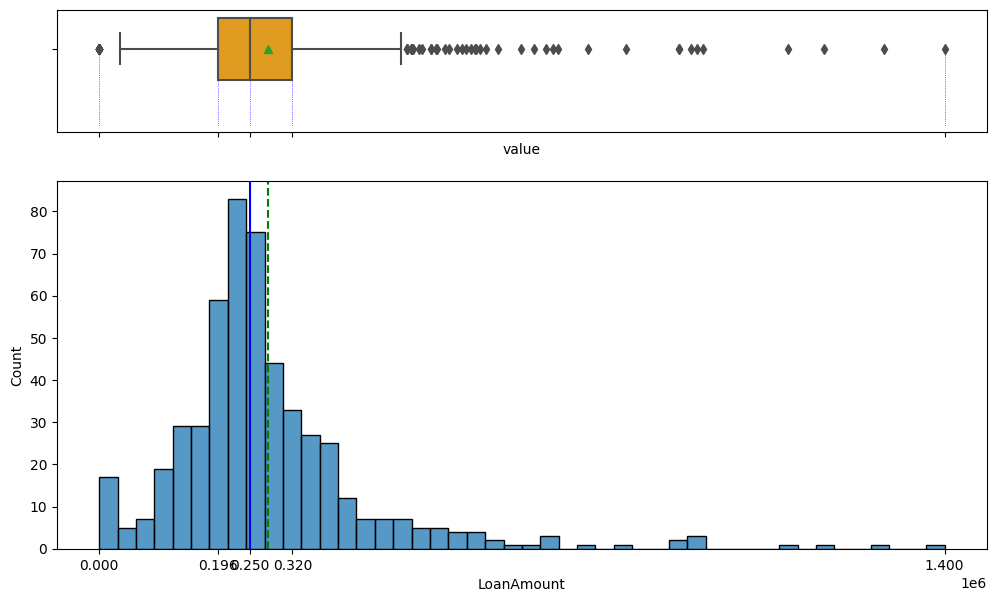

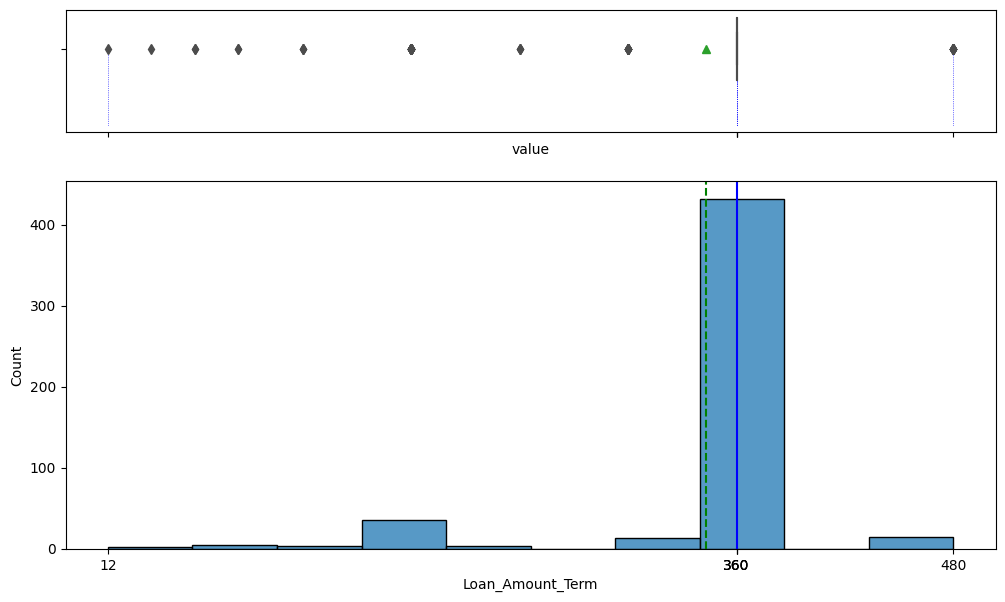

In [24]:
for col in df_num.columns:
  histogram_boxplot(df, col)

**Observations**
- The numerical features are highly skewed
- Applicant Income, Coapplicant Income and Loan Amount being positively skewed and Loan amount Term being negatively skewed.
- There are some outliers visible. However, Taking it as the nature of the data

### **Categorical Features**

In [25]:
df_cat = df.drop(['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term'], axis = 1)

**Converting to type category**

In [26]:
to_cat_list = ['Credit_History', 'Loan_Status']

for col in df_cat.columns:
    df[col] = df[col].astype("category")
    df_cat[col] = df_cat[col].astype("category")

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          511 non-null    category
 1   Married         518 non-null    category
 2   Dependents      508 non-null    category
 3   Education       521 non-null    category
 4   Self_Employed   494 non-null    category
 5   Credit_History  478 non-null    category
 6   Property_Area   521 non-null    category
 7   Loan_Status     521 non-null    category
dtypes: category(8)
memory usage: 5.3 KB


#### **Visualization**

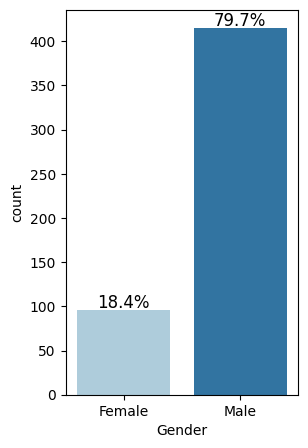

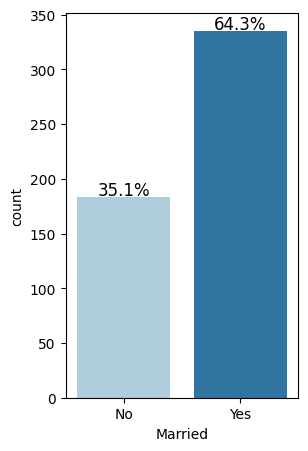

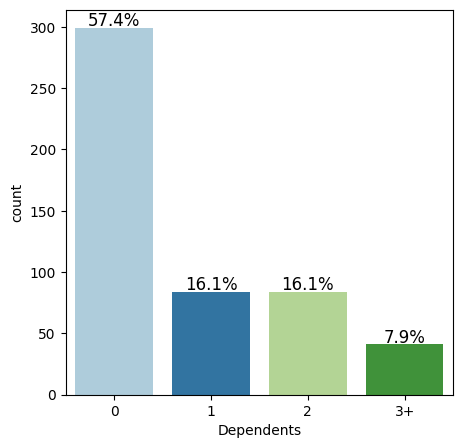

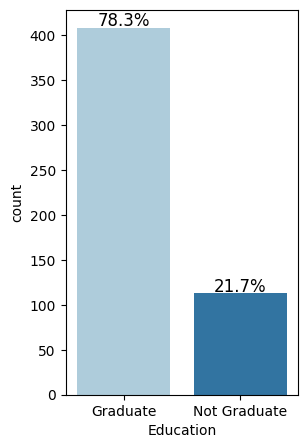

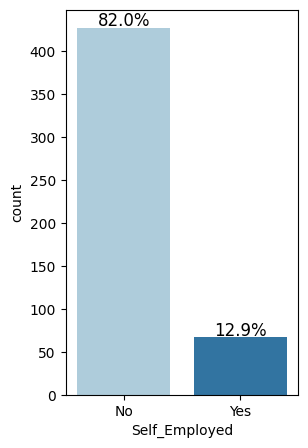

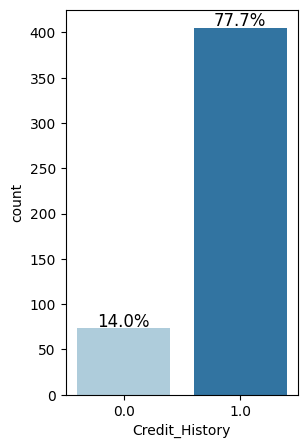

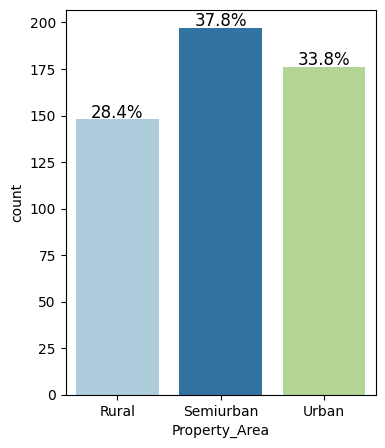

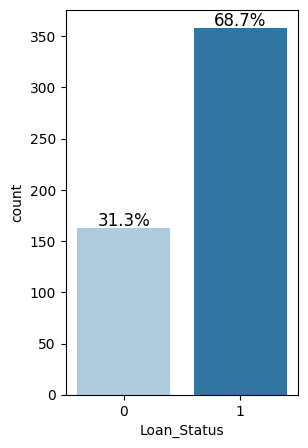

In [28]:
for col in df_cat.columns:

  labeled_barplot(df_cat, col, True, False)


**Observations**

- The number of Female applicants is almost one fourth that of the number of Male applicants
- 64% of the applicants are married
- The number of applicants with 0 dependents are the highest
- Majority of the applicants are Graduates
- Number of applicants not self employed are significantly more than applicants who are self employed
- Approximately 77% of the applicants do have a credit history
- Maximum property types are Semi Urban
- All the features seem to have high variance, enough to be able to differentiate between event and non event.

In [29]:
for col in df_cat.columns:
    df[col] = df[col].astype("object")
    df_cat[col] = df_cat[col].astype("object")

In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          511 non-null    object
 1   Married         518 non-null    object
 2   Dependents      508 non-null    object
 3   Education       521 non-null    object
 4   Self_Employed   494 non-null    object
 5   Credit_History  478 non-null    object
 6   Property_Area   521 non-null    object
 7   Loan_Status     521 non-null    object
dtypes: object(8)
memory usage: 32.7+ KB


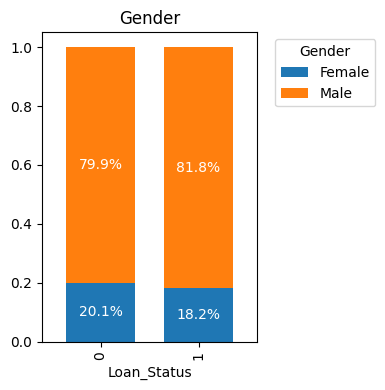

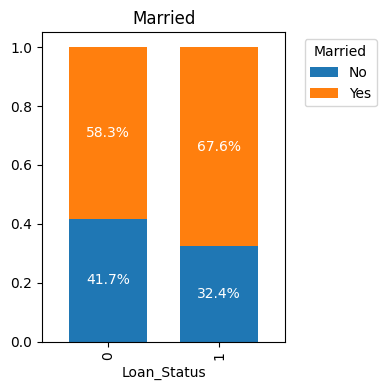

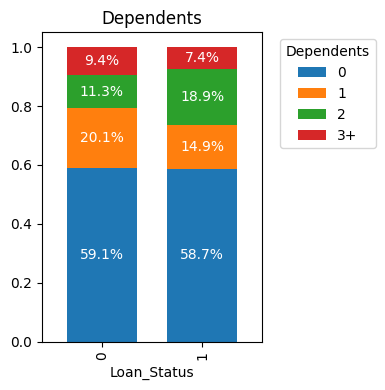

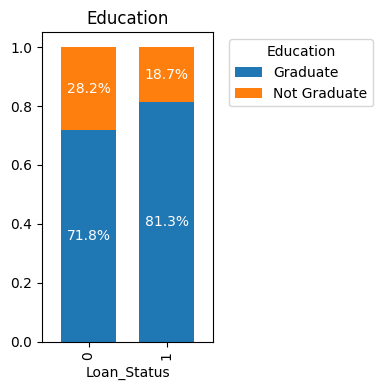

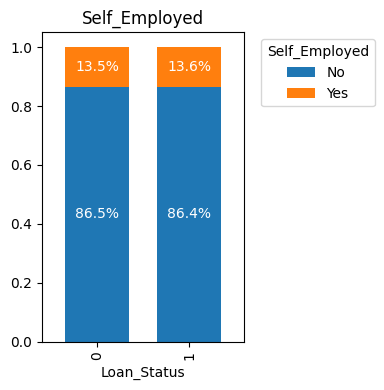

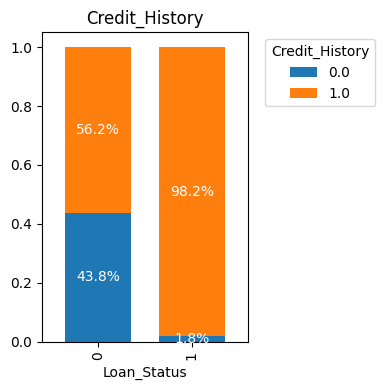

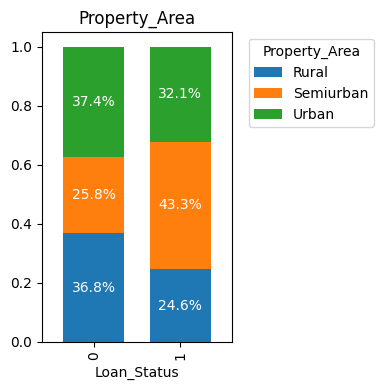

In [31]:
for col in df_cat.columns:
  stacked_count_grouped(df_cat, col, 'Loan_Status')

**Observations**
- The **Gender** and **Self Employment** status of the applicant have little to no impact on the Loan Status. Thus offering no variance, and so can be dropped.

**Dropping the target variable from Categorical features**

In [32]:
df_cat = df_cat.drop('Loan_Status', axis = 1)

## **Multivariate Analysis**

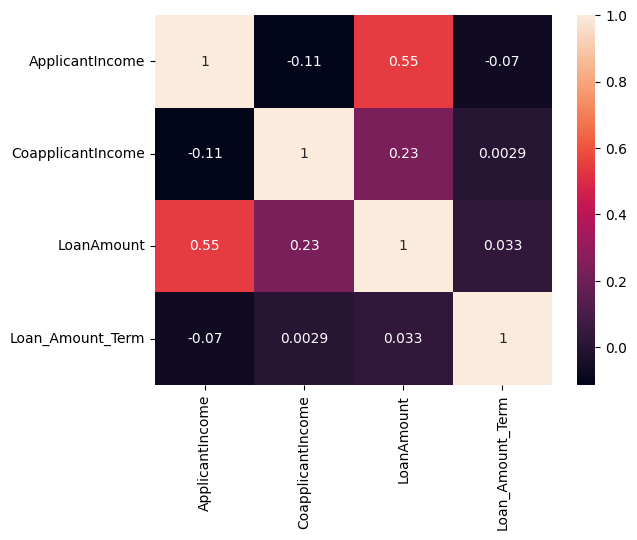

In [33]:
sns.heatmap(df_num.corr(), annot = True)
plt.show()

**Observations**
- Applicant income is significantly positively correlated to the Loan Amount
- Co-Applicant income is also slightly positively correlated to Loan Amount
- Credit History is the only feature having direct and positive correlation with the Loan Status which is the Target variable

## **Feature Engineering**
- Creating two new features
- EMI (Loan Amount / Loan Amount Term) and Total Income (combining Applicant Income + Co Applicant Income)
- Applicant Income and coApplicant Income Have a slight negative collinearity which does not much affect the model.
- Loan amount and loan amount term have close to 0 collinearity



In [34]:
# # Create new feature EMI (Equated Monthly Installment)
# df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

# # Create new feature TotalIncome
# df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [35]:
# df.head()

In [36]:
df_num = df.select_dtypes(["int64", "float64"])
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1316025,0.0,250000,360.0
1,1031175,339300.0,256000,360.0
2,675000,0.0,132000,360.0
3,581175,530550.0,240000,360.0
4,1350000,0.0,282000,360.0


In [37]:
# sns.heatmap(df_num.corr(), annot = True)
# plt.show()

- The new features do introduce a moderate multicollinearity. Testing with the model first is requires to assess the impact of multicollinearity.

## **Feature Transformation**

### **Feature Scaling**

- The numerical features that we have, differ by a large scale. (Loan Term - 100 - 400, Applicant Income 10k - 150k)
- Algorithms that use distance-based metrics or gradient-based optimization techniques benefit from scaling. Support Vector Machines (SVM) is one of the classification algorithms that is to be tested later so the data should be scaled and prepped now.

**Scaling method - Standardization(Z score Scaler)**

- Our data is highly skewed. Standardization will be a good choice here since it preserves the relative distances bettween data points and reduces the influence of extreme values on the scaling process.

In [38]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1316025,0.0,250000,360.0
1,1031175,339300.0,256000,360.0
2,675000,0.0,132000,360.0
3,581175,530550.0,240000,360.0
4,1350000,0.0,282000,360.0


In [39]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num)
standard_df = pd.DataFrame(standard_df, columns =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

In [40]:
standard_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.059804,-0.725361,-0.173623,0.263336
1,-0.136866,-0.021370,-0.138553,0.263336
2,-0.382781,-0.725361,-0.863334,0.263336
3,-0.447561,0.375442,-0.232073,0.263336
4,0.083262,-0.725361,0.013418,0.263336


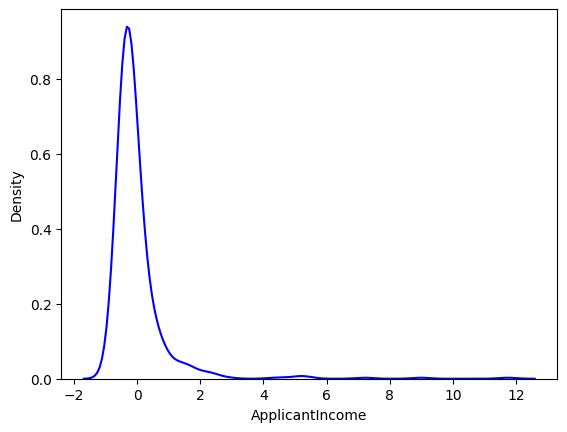

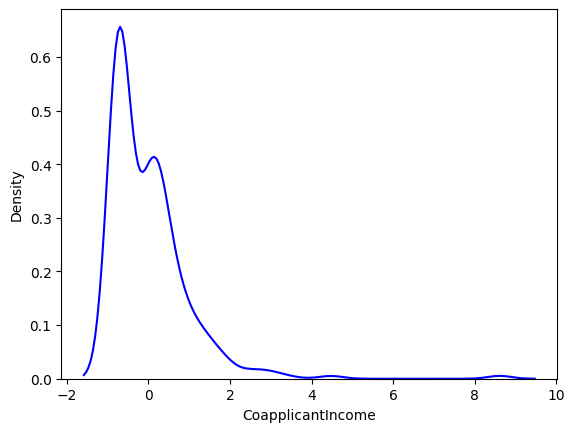

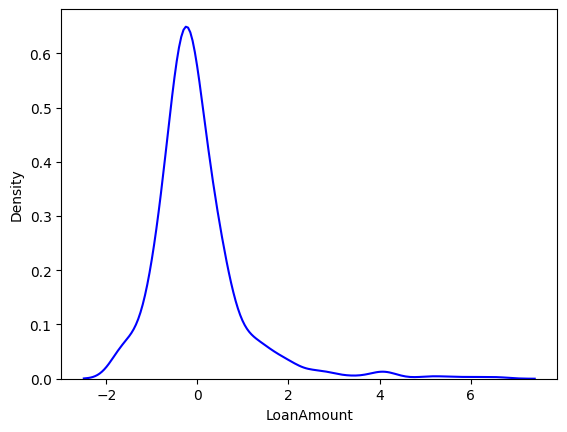

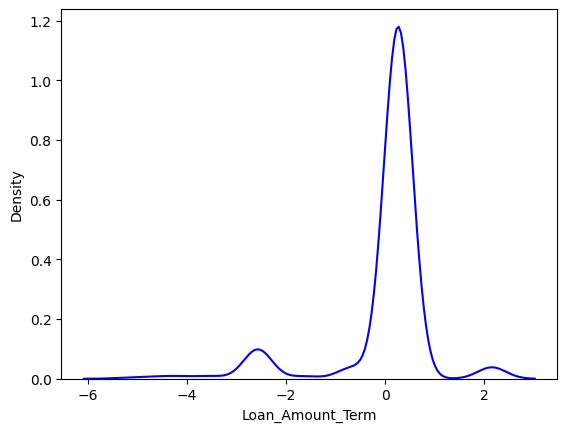

In [41]:
for col in standard_df.columns:
  sns.kdeplot(standard_df[col], color ='blue')
  plt.show()

All the features distributions are brought to be centered at 0

###**Encoding Categorical Variables:**
- **One hot encoding method** - Transforming data into a binary numerical format for the algorithm to process

In [42]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [43]:
#creating features with n-1 variables
df_dummies = pd.get_dummies(df_cat, drop_first = True)
df_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,True,False,False,False,False,False,False,True,False,True
1,True,True,True,False,False,False,False,True,False,False
2,True,True,False,False,False,False,True,True,False,True
3,True,True,False,False,False,True,False,True,False,True
4,True,False,False,False,False,False,False,True,False,True


### **Converting Target variable to Integer**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             511 non-null    object 
 1   Married            518 non-null    object 
 2   Dependents         508 non-null    object 
 3   Education          521 non-null    object 
 4   Self_Employed      494 non-null    object 
 5   ApplicantIncome    521 non-null    int64  
 6   CoapplicantIncome  521 non-null    float64
 7   LoanAmount         521 non-null    int64  
 8   Loan_Amount_Term   507 non-null    float64
 9   Credit_History     478 non-null    object 
 10  Property_Area      521 non-null    object 
 11  Loan_Status        521 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 49.0+ KB


In [45]:
Y = df['Loan_Status'].astype('int64')

### **KNN imputation**

In [46]:
X_combined = pd.concat([df_dummies,df_num], axis = 1, join='inner')

In [47]:
X_combined.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,True,False,False,False,False,False,False,True,False,True,1316025,0.0,250000,360.0
1,True,True,True,False,False,False,False,True,False,False,1031175,339300.0,256000,360.0
2,True,True,False,False,False,False,True,True,False,True,675000,0.0,132000,360.0
3,True,True,False,False,False,True,False,True,False,True,581175,530550.0,240000,360.0
4,True,False,False,False,False,False,False,True,False,True,1350000,0.0,282000,360.0


In [48]:
 # import the KNNimputer class
from sklearn.impute import KNNImputer

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_combined)

#Convert the imputed data back to dataframe
X_features = pd.DataFrame(X_imputed, columns=X_combined.columns)

# print dataset after performing the operation
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              521 non-null    float64
 1   Married_Yes              521 non-null    float64
 2   Dependents_1             521 non-null    float64
 3   Dependents_2             521 non-null    float64
 4   Dependents_3+            521 non-null    float64
 5   Education_Not Graduate   521 non-null    float64
 6   Self_Employed_Yes        521 non-null    float64
 7   Credit_History_1.0       521 non-null    float64
 8   Property_Area_Semiurban  521 non-null    float64
 9   Property_Area_Urban      521 non-null    float64
 10  ApplicantIncome          521 non-null    float64
 11  CoapplicantIncome        521 non-null    float64
 12  LoanAmount               521 non-null    float64
 13  Loan_Amount_Term         521 non-null    float64
dtypes: float64(14)
memory usag

In [49]:
X_num = X_features[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
X_cat = X_features.drop(X_num.columns, axis = 1)

# PCA

In [135]:
#Performing PCA for numerical features since ther is visible collinearity
# Perform PCA with the desired number of components
from sklearn.decomposition import PCA

num_components = 3  # Number of principal components to retain
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_num)

# Create a DataFrame with the transformed data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])

In [136]:
pca_df.head()

,PC1,PC2,PC3
0,98943.762497,-347559.941741,4135.959139
1,-198749.619023,-19666.427905,-8690.056737
2,-547804.108052,-382873.153631,-68714.707499
3,-656386.913615,153128.570229,-15213.684381
4,134882.388551,-342711.580750,33516.380793


**Binning and Discretization**
- Binning is useful to capture non-linear relationships between the numerical feature and the target variable or when handling data with limited precision or outliers.

In [137]:
#Performing binning for the numerical features to select best k
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(pca_df),index=pca_df.index, columns = pca_df.columns ).add_suffix('_Rank')
num_binned.head()

,PC1_Rank,PC2_Rank,PC3_Rank
0,7.0,2.0,5.0
1,6.0,5.0,4.0
2,2.0,0.0,1.0
3,1.0,7.0,4.0
4,7.0,2.0,7.0


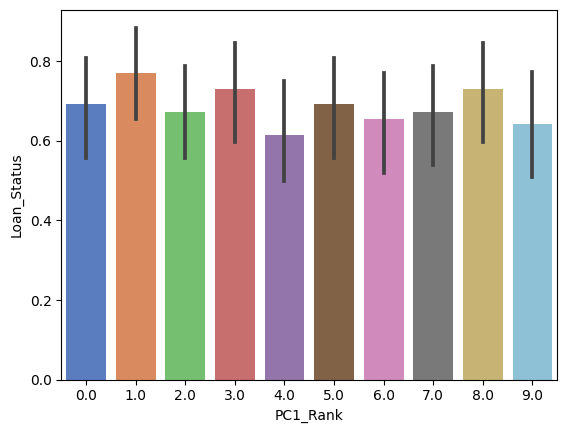

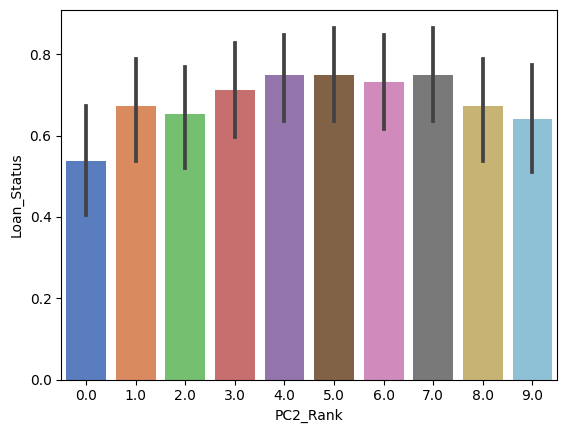

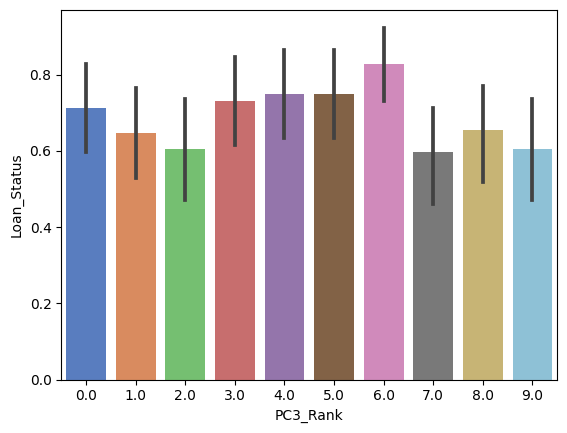

In [138]:
X_bin_combined = pd.concat([df['Loan_Status'],num_binned], axis = 1, join='inner')

from numpy import mean
for col in num_binned.columns:
  plt.figure()
  sns.barplot(x=col, y=df['Loan_Status'], data=X_bin_combined, estimator=mean, palette='muted')

In [52]:
X_bin_combined = pd.concat([df['Loan_Status'],num_binned, X_cat], axis = 1, join='inner')

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Initialize a classifier for downstream task (e.g., classification)
classifier = RandomForestClassifier()

# Perform cross-validation with imputed data
imputed_scores = cross_val_score(classifier, X_bin_combined, Y, cv=5, scoring='accuracy')

# Perform cross-validation without imputation (using original data)
original_scores = cross_val_score(classifier, X_features, Y, cv=5, scoring='accuracy')

# Print mean accuracy scores
print("Accuracy with Imputation:", np.mean(imputed_scores))
print("Accuracy without Imputation:", np.mean(original_scores))

Accuracy with Imputation: 1.0
Accuracy without Imputation: 0.7043406593406594


- All the features have variance enough to capture the event and non event for the target variable and so must be kept. Binninng preserves the ordinality in the data, and so can be directly fed to the models that can naturally handle ordinal data.  

## **Feature selection**

### **Selecting K best features**

In [140]:
X_feat = pd.concat([X_cat, num_binned], axis = 1, join = 'inner')
X_feat.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,PC1_Rank,PC2_Rank,PC3_Rank
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,2.0,5.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,5.0,4.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,7.0,4.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,2.0,7.0


In [141]:
#selecting the Kbest for categorical cols
# chi sq test used to compare and score the categorical features

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit_transform(X_cat, Y)

# Get columns to keep and create a new dataframe with selected features
cols = selector.get_support(indices = True)
selected_features_df_char = X_cat.iloc[:,cols]

In [142]:
selected_features_df_char.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [143]:
#selecting the Kbest for numerical cols
# chi sq test used to compare and score the categorical features

from sklearn.feature_selection import SelectKBest,  f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit_transform(num_binned, Y)

# Get columns to keep and create a new dataframe with selected features
cols = selector.get_support(indices = True)
selected_features_df_num = num_binned.iloc[:,cols]

In [144]:
selected_features_df_num.head()

,PC1_Rank,PC2_Rank,PC3_Rank
0,7.0,2.0,5.0
1,6.0,5.0,4.0
2,2.0,0.0,1.0
3,1.0,7.0,4.0
4,7.0,2.0,7.0


## **Master Feature Set**

In [145]:
X_final = pd.concat([selected_features_df_char, selected_features_df_num], axis = 1, join = 'inner')
X_final.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,PC1_Rank,PC2_Rank,PC3_Rank
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,2.0,5.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,5.0,4.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,7.0,4.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,2.0,7.0


## **Splitting Train and Test data**

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_final, Y, test_size = 0.3, random_state=10)

* Non Linearity in feature relationships are observed which makes tree methods a good choice
* There are few options to consider among tree methods
  - White Box (Completely Explainable Set of Rules) - Decision Tree
  - Ensemble Methods - Random Forest (With Bagging)
  - Ensemble Methods - GBM/XGBoost (Boosting)

## **Feature Importance**

#### **Random Forest**

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [155]:
rf.score(x_train,y_train)

0.989010989010989

In [156]:
rf.score(x_test,y_test)

0.732484076433121

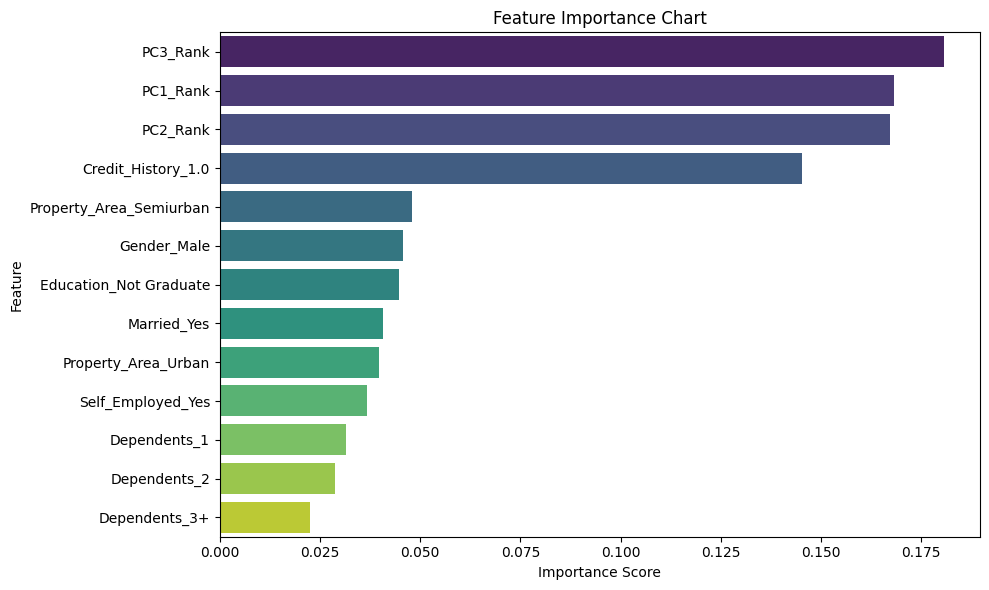

In [150]:
# Get feature importances from the trained model
importances = rf.feature_importances_
feature_names = X_final.columns

# Create a DataFrame to store feature names and importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the horizontal bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance Chart')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Model Building**

##### **Function**

In [157]:
from sklearn import metrics

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[]

    # predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    # accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)

    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    # populate the score_list
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)

    return score_list # returning the list with train n test scores

#### **Models**

In [66]:
# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


In [158]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [159]:
lr_score = get_metrics_score(lr)

Accuracy on training set :  0.760989010989011
Accuracy on test set :  0.7515923566878981
Recall on training set :  0.907258064516129
Recall on test set :  0.9363636363636364
Precision on training set :  0.7785467128027682
Precision on test set :  0.762962962962963
F1 on training set :  0.8379888268156424
F1 on test set :  0.8408163265306122


In [160]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training dataset
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [70]:
# grid search CV for hyperparameter tuning of our Decision Tree
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtc, cv = 10, param_grid= param_dist,n_jobs = 3)
tree_grid.fit(x_train, y_train)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 3, 'min_samples_split': 50}


In [161]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(dtc)

Accuracy on training set :  0.989010989010989
Accuracy on test set :  0.5923566878980892
Recall on training set :  1.0
Recall on test set :  0.7090909090909091
Precision on training set :  0.9841269841269841
Precision on test set :  0.7090909090909091
F1 on training set :  0.9919999999999999
F1 on test set :  0.7090909090909091


In [162]:
gbm = GradientBoostingClassifier(criterion='squared_error',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(x_train, y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=6,
                           min_samples_split=50, random_state=0)

In [73]:
feature_imp_gbm = pd.DataFrame(gbm.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_imp_gbm

,importance
Credit_History_1.0,0.262840
LoanAmount_Rank,0.209198
ApplicantIncome_Rank,0.193588
Education_Not Graduate,0.051767
Gender_Male,0.042254
Property_Area_Semiurban,0.040200
Self_Employed_Yes,0.037679
Loan_Amount_Term_Rank,0.036527
Married_Yes,0.035723
Dependents_1,0.029889


In [163]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(gbm)

Accuracy on training set :  0.9642857142857143
Accuracy on test set :  0.6687898089171974
Recall on training set :  0.9838709677419355
Recall on test set :  0.8454545454545455
Precision on training set :  0.9644268774703557
Precision on test set :  0.7265625
F1 on training set :  0.9740518962075848
F1 on test set :  0.7815126050420168


In [165]:
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [166]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(clf)

Accuracy on training set :  0.75
Accuracy on test set :  0.7834394904458599
Recall on training set :  0.8790322580645161
Recall on test set :  0.9181818181818182
Precision on training set :  0.7813620071684588
Precision on test set :  0.8015873015873016
F1 on training set :  0.8273244781783682
F1 on test set :  0.8559322033898306


In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [169]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)


In [170]:
# Hyperparameter tuning for each classifier
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier()
}

In [171]:
results = []
for clf_name, clf in classifiers.items():
    
    clf.fit(X_train, y_train)
    
    # Train and predict with the best estimator
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate confusion matrix metrics
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
    TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

    results.append({
        'Model': clf_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Train F1-Score': f1_score(y_train, y_train_pred),
        'Test F1-Score': f1_score(y_test, y_test_pred),
        'Train Specificity': TN_train / (TN_train + FP_train),
        'Test Specificity': TN_test / (TN_test + FP_test),
        'Train Sensitivity': TP_train / (TP_train + FN_train),
        'Test Sensitivity': TP_test / (TP_test + FN_test)
    })

In [172]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Specificity,Test Specificity,Train Sensitivity,Test Sensitivity
0,Logistic Regression,0.747596,0.752381,0.770588,0.752941,0.906574,0.927536,0.833068,0.831169,0.385827,0.416667,0.906574,0.927536
1,Decision Tree,0.990385,0.657143,0.996516,0.761905,0.989619,0.695652,0.993056,0.727273,0.992126,0.583333,0.989619,0.695652
2,Random Forest,0.990385,0.704762,0.993080,0.737500,0.993080,0.855072,0.993080,0.791946,0.984252,0.416667,0.993080,0.855072
3,Gradient Boosting,0.884615,0.695238,0.868502,0.746667,0.982699,0.811594,0.922078,0.777778,0.661417,0.472222,0.982699,0.811594
4,SVC,0.694712,0.657143,0.694712,0.657143,1.000000,1.000000,0.819858,0.793103,0.000000,0.000000,1.000000,1.000000
5,AdaBoost,0.737981,0.790476,0.772727,0.783133,0.882353,0.942029,0.823910,0.855263,0.409449,0.500000,0.882353,0.942029
6,XGBoost,0.990385,0.714286,0.989691,0.767123,0.996540,0.811594,0.993103,0.788732,0.976378,0.527778,0.996540,0.811594
7,KNN,0.764423,0.657143,0.770538,0.689655,0.941176,0.869565,0.847352,0.769231,0.362205,0.250000,0.941176,0.869565


## K fold cross validation before Hyper parameter tuning

In [173]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [174]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Use appropriate values for n_splits and random_state

In [175]:
# Initialize dictionaries to store evaluation metrics
cv_scores = {}
cv_sensitivity = {}
cv_specificity = {}
cv_precision = {}

In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate  # Make sure to install the 'tabulate' library


# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Use appropriate values for n_splits and random_state


# Initialize lists to store results
results = []

# Loop through each model and perform k-fold cross-validation
for clf_name, clf in classifiers.items():
    metrics = []
    
    for train_index, test_index in kf.split(X_final):
        X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        precision = precision_score(y_test, y_pred)
        
        # Append metrics to the list
        metrics.append([accuracy, sensitivity, specificity, precision])
    
    # Calculate average metrics
    avg_metrics = np.mean(metrics, axis=0)
    results.append([clf_name] + list(avg_metrics))

# Print results in tabular format
headers = ['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision']

metrics_df = pd.DataFrame(results, columns = headers)
metrics_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression,0.752399,0.902451,0.418415,0.775053
1,Decision Tree,0.639011,0.720501,0.452600,0.745709
2,Random Forest,0.735201,0.847811,0.477867,0.784795
3,Gradient Boosting,0.712125,0.834320,0.434157,0.766594
4,SVC,0.687198,1.000000,0.000000,0.687198
5,AdaBoost,0.746557,0.891175,0.423998,0.774190
6,XGBoost,0.719780,0.806200,0.522115,0.790317
7,KNN,0.687198,0.890800,0.234827,0.719992


## **Hyperparameter Tuning**

In [177]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
    'SVC': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
    'KNN': {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20]}
}

In [178]:
# param_grids = {
#     'Logistic Regression': {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
#     'Decision Tree': {'max_depth' : [3,5,7,9,10,12,14,16] , 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]},
#     'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth' : [3,5,7,8,9,10,12,14,16],
#                       'min_samples_split': [2, 5, 10], 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]},
#     'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
#     'SVC': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
#     'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
#     'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.01, 0.001]},
#     'KNN': {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20]}

# }

In [179]:
results = []
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    clf = best_estimator
    
    # Train and predict with the best estimator
    y_train_pred = best_estimator.predict(X_train)
    y_test_pred = best_estimator.predict(X_test)

    # Calculate confusion matrix metrics
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
    TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

    results.append({
        'Model': clf_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Train F1-Score': f1_score(y_train, y_train_pred),
        'Test F1-Score': f1_score(y_test, y_test_pred),
        'Train Specificity': TN_train / (TN_train + FP_train),
        'Test Specificity': TN_test / (TN_test + FP_test),
        'Train Sensitivity': TP_train / (TP_train + FN_train),
        'Test Sensitivity': TP_test / (TP_test + FN_test)
    })

In [180]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Specificity,Test Specificity,Train Sensitivity,Test Sensitivity
0,Logistic Regression,0.769784,0.730769,0.787037,0.772727,0.904255,0.894737,0.841584,0.829268,0.488889,0.285714,0.904255,0.894737
1,Decision Tree,0.880096,0.615385,0.911348,0.725000,0.911348,0.763158,0.911348,0.743590,0.814815,0.214286,0.911348,0.763158
2,Random Forest,0.865707,0.740385,0.866883,0.769231,0.946809,0.921053,0.905085,0.838323,0.696296,0.250000,0.946809,0.921053
3,Gradient Boosting,0.784173,0.730769,0.798137,0.772727,0.911348,0.894737,0.850993,0.829268,0.518519,0.285714,0.911348,0.894737
4,SVC,0.808153,0.740385,0.825806,0.781609,0.907801,0.894737,0.864865,0.834356,0.600000,0.321429,0.907801,0.894737
5,AdaBoost,0.764988,0.740385,0.789308,0.781609,0.890071,0.894737,0.836667,0.834356,0.503704,0.321429,0.890071,0.894737
6,XGBoost,0.827338,0.634615,0.852349,0.743590,0.900709,0.763158,0.875862,0.753247,0.674074,0.285714,0.900709,0.763158
7,KNN,0.748201,0.701923,0.758017,0.736842,0.921986,0.921053,0.832000,0.818713,0.385185,0.107143,0.921986,0.921053


In [181]:
# results_check = []
# for clf_name, clf in classifiers.items():
    
#     # Train and predict with the best estimator
#     y_train_pred = clf.predict(X_train)
#     y_test_pred = clf.predict(X_test)

#     # Calculate confusion matrix metrics
#     cm_train = confusion_matrix(y_train, y_train_pred)
#     cm_test = confusion_matrix(y_test, y_test_pred)
#     TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
#     TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

#     results_check.append({
#         'Model': clf_name,
#         'Train Accuracy': accuracy_score(y_train, y_train_pred),
#         'Test Accuracy': accuracy_score(y_test, y_test_pred),
#         'Train Precision': precision_score(y_train, y_train_pred),
#         'Test Precision': precision_score(y_test, y_test_pred),
#         'Train Recall': recall_score(y_train, y_train_pred),
#         'Test Recall': recall_score(y_test, y_test_pred),
#         'Train F1-Score': f1_score(y_train, y_train_pred),
#         'Test F1-Score': f1_score(y_test, y_test_pred),
#         'Train Specificity': TN_train / (TN_train + FP_train),
#         'Test Specificity': TN_test / (TN_test + FP_test),
#         'Train Sensitivity': TP_train / (TP_train + FN_train),
#         'Test Sensitivity': TP_test / (TP_test + FN_test)
#     })
    
# results_check = pd.DataFrame(results_check)
# display(results_check)

## K fold cross validation after Hyperparameter Tuning

In [182]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Use appropriate values for n_splits and random_state


# Initialize lists to store results
results = []

# Loop through each model and perform k-fold cross-validation
for clf_name, clf in classifiers.items():
    metrics = []
    
    for train_index, test_index in kf.split(X_final):
        X_train, X_test = X_final.iloc[train_index], X_final.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        precision = precision_score(y_test, y_pred)
        
        # Append metrics to the list
        metrics.append([accuracy, sensitivity, specificity, precision])
    
    # Calculate average metrics
    avg_metrics = np.mean(metrics, axis=0)
    results.append([clf_name] + list(avg_metrics))

# Print results in tabular format
headers = ['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision']

metrics_df = pd.DataFrame(results, columns = headers)
metrics_df

,Model,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression,0.752399,0.902451,0.418415,0.775053
1,Decision Tree,0.635293,0.713702,0.456165,0.743604
2,Random Forest,0.702527,0.828777,0.415858,0.760601
3,Gradient Boosting,0.710201,0.834320,0.427705,0.764711
4,SVC,0.687198,1.000000,0.000000,0.687198
5,AdaBoost,0.746557,0.891175,0.423998,0.774190
6,XGBoost,0.719780,0.806200,0.522115,0.790317
7,KNN,0.687198,0.890800,0.234827,0.719992


'Logistic Regression'

<Figure size 200x100 with 0 Axes>

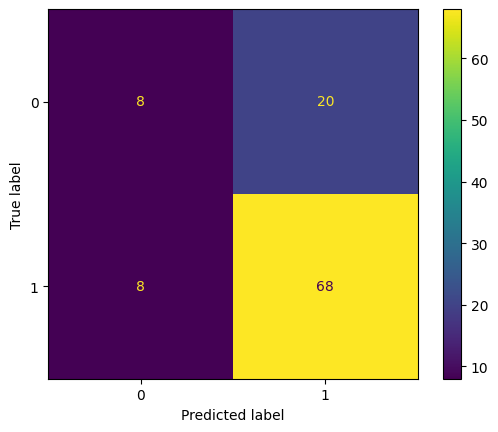

'Decision Tree'

<Figure size 200x100 with 0 Axes>

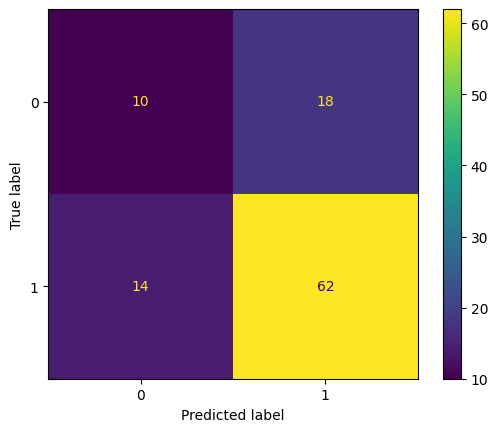

'Random Forest'

<Figure size 200x100 with 0 Axes>

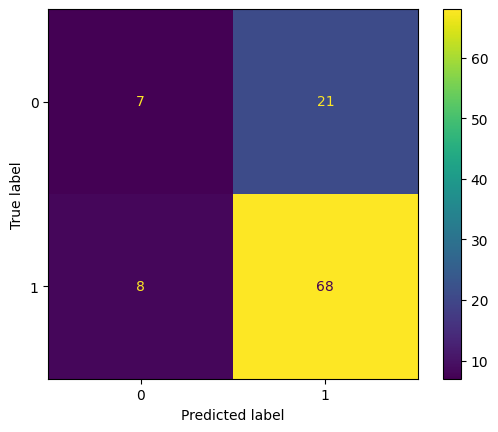

'Gradient Boosting'

<Figure size 200x100 with 0 Axes>

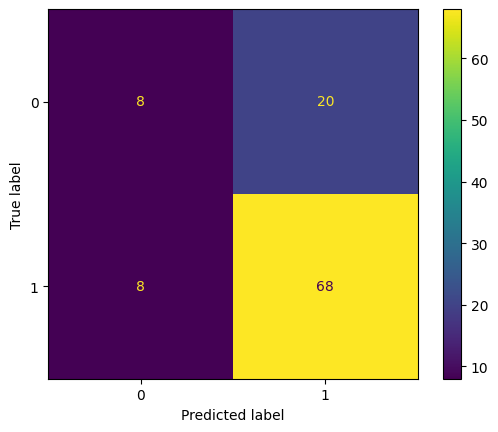

'SVC'

<Figure size 200x100 with 0 Axes>

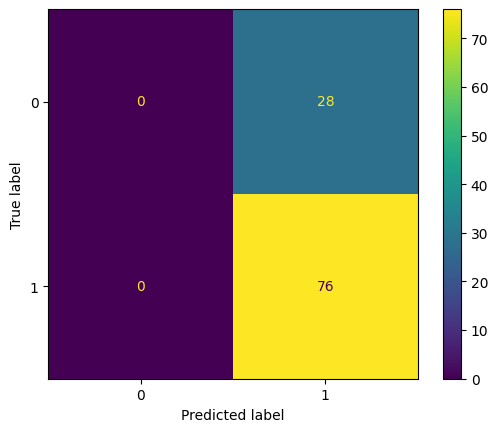

'AdaBoost'

<Figure size 200x100 with 0 Axes>

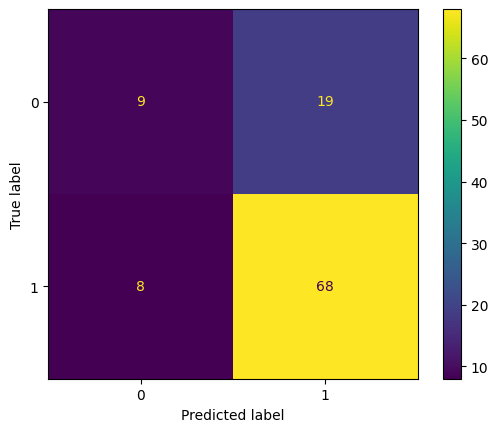

'XGBoost'

<Figure size 200x100 with 0 Axes>

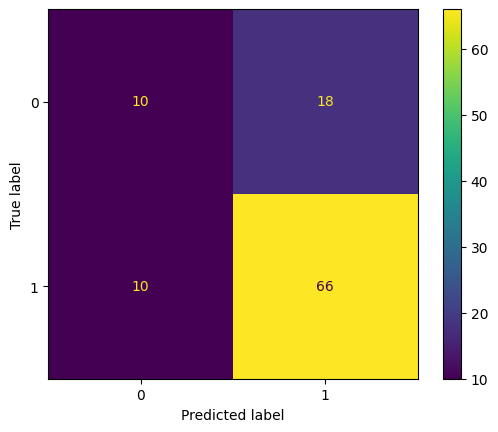

'KNN'

<Figure size 200x100 with 0 Axes>

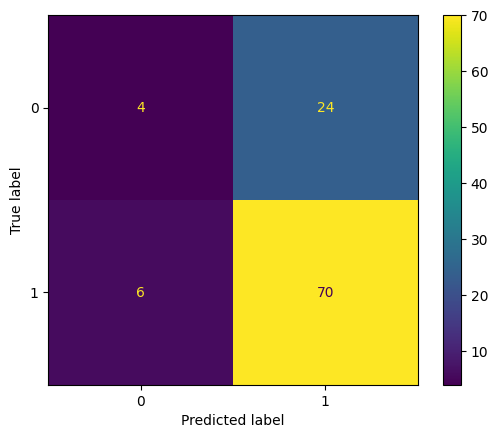

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


for clf_name, clf in classifiers.items():
    
  y = clf.predict(X_test)
  display(clf_name)

  cm = confusion_matrix(y_test, y)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_ )

  plt.figure(figsize=(2, 1)) 
  disp.plot()
  plt.show()


'Logistic Regression'

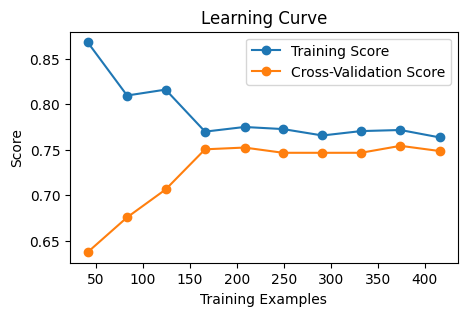

'Decision Tree'

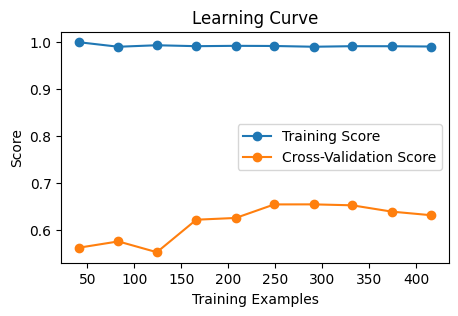

'Random Forest'

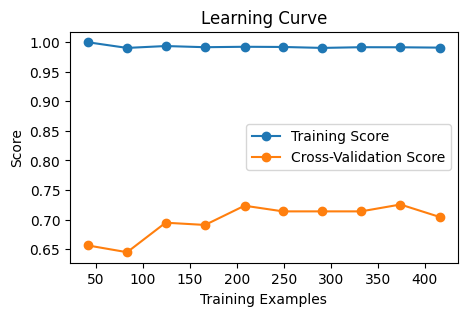

'Gradient Boosting'

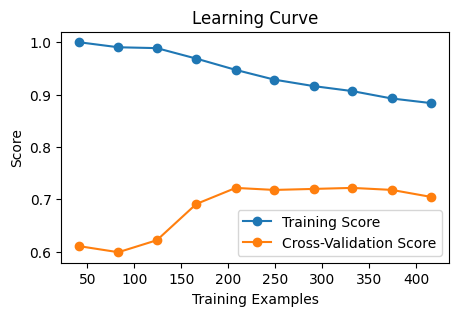

'SVC'

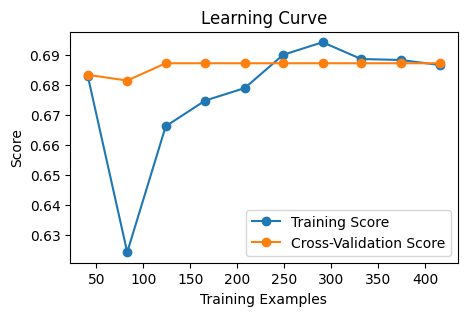

'AdaBoost'

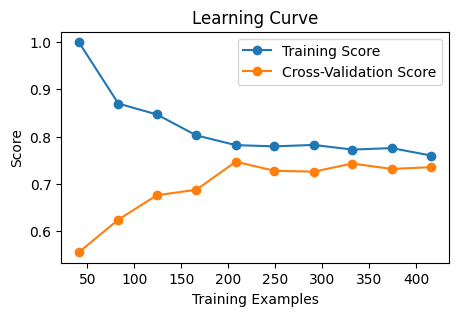

'XGBoost'

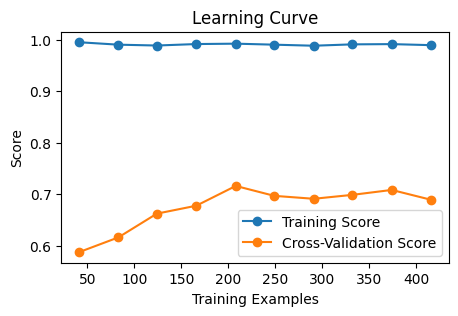

'KNN'

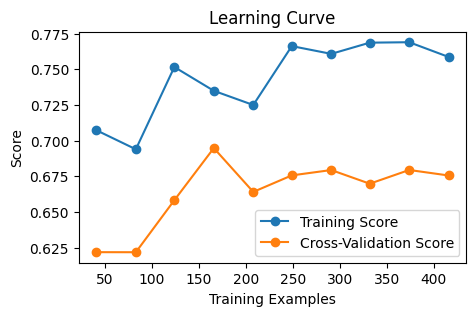

In [184]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

for clf_name, clf in classifiers.items():
    
# Plot Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(
    clf, X_final, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    display(clf_name)

    plt.figure(figsize=(5, 3))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()


# Chosen model Logistic regression

In [185]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2','elasticnet', None],  # Regularization penalty (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200]  # Maximum number of iterations
}

In [186]:
# Ramping up the accuracy further
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
grid_search = GridSearchCV(classifiers['Logistic Regression'], param_grid, cv=5, scoring='accuracy')


In [187]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio paramet

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio param

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio param

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameter

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameter

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                               100],
                         'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [188]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [189]:
# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [191]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7403846153846154


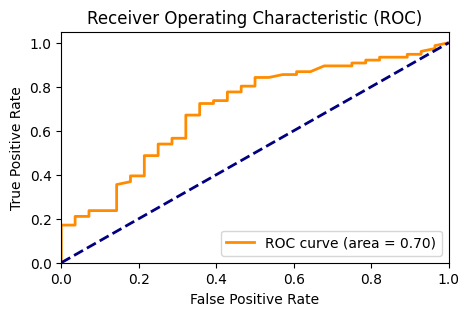

In [192]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Get predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

'KNN'

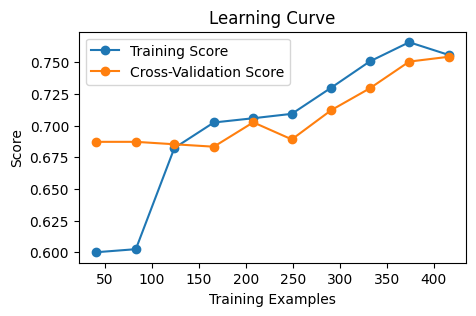

In [194]:
# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
best_model, X_final, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

display(clf_name)

plt.figure(figsize=(5, 3))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()